# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [3]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans

# Untuk evaluasi clustering
from sklearn.metrics import silhouette_score

# Mengabaikan warning agar output bersih
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib

ModuleNotFoundError: No module named 'yellowbrick'

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [39]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

print("Lima baris pertama:")
print(df.head())

Lima baris pertama:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor  

In [40]:
# Tampilkan info struktur data
print("nInfo DataFrame:")
print(df.info())


nInfo DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Account

In [41]:
print("Statistik deskriptif:")
print(df.describe()) # Menampilkan statistik deskriptif dataset dengan menjalankan describe

Statistik deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

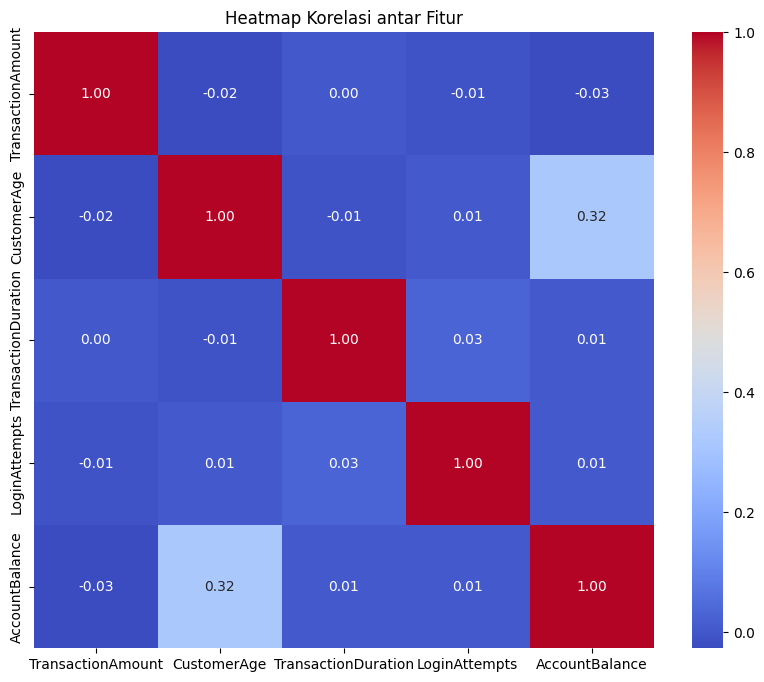

In [42]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

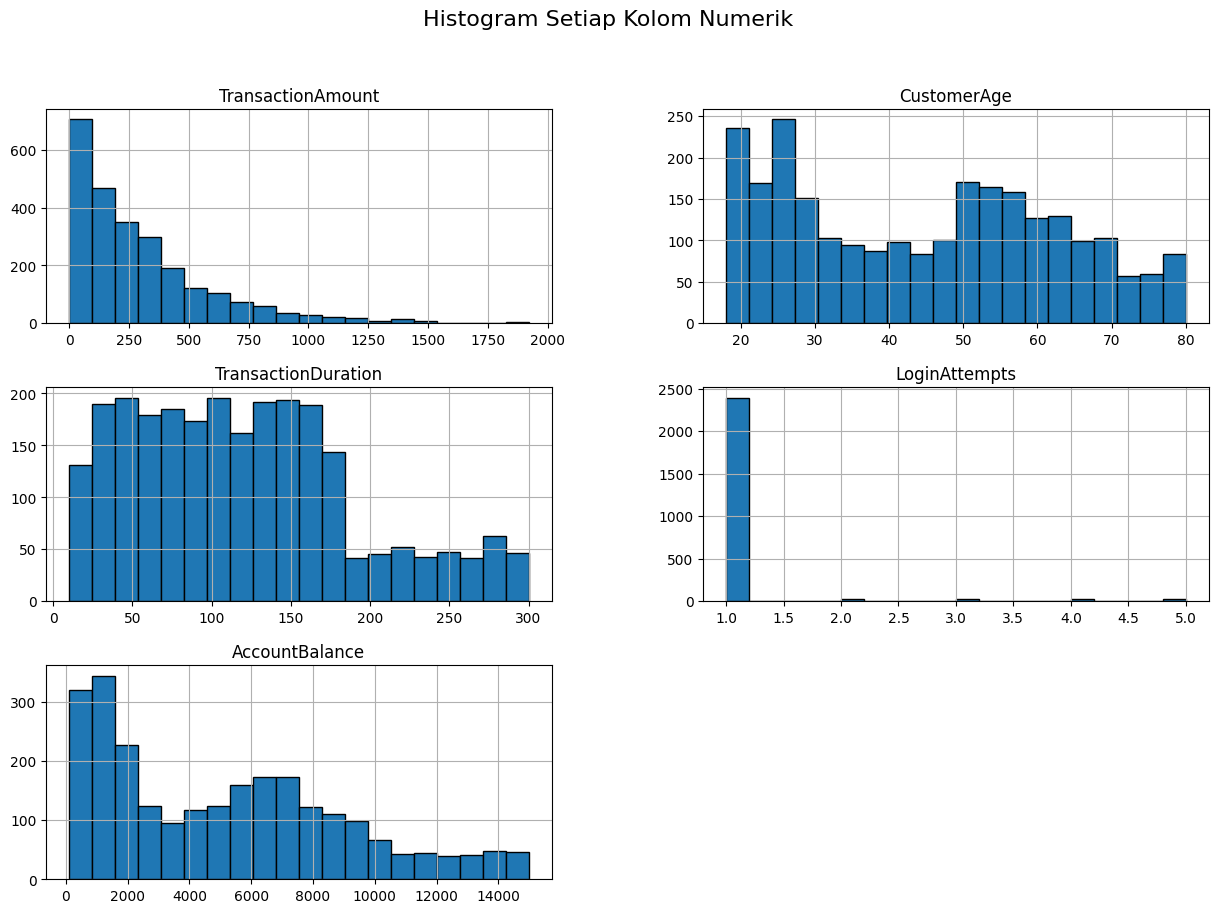

In [43]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histogram Setiap Kolom Numerik", fontsize=16)
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

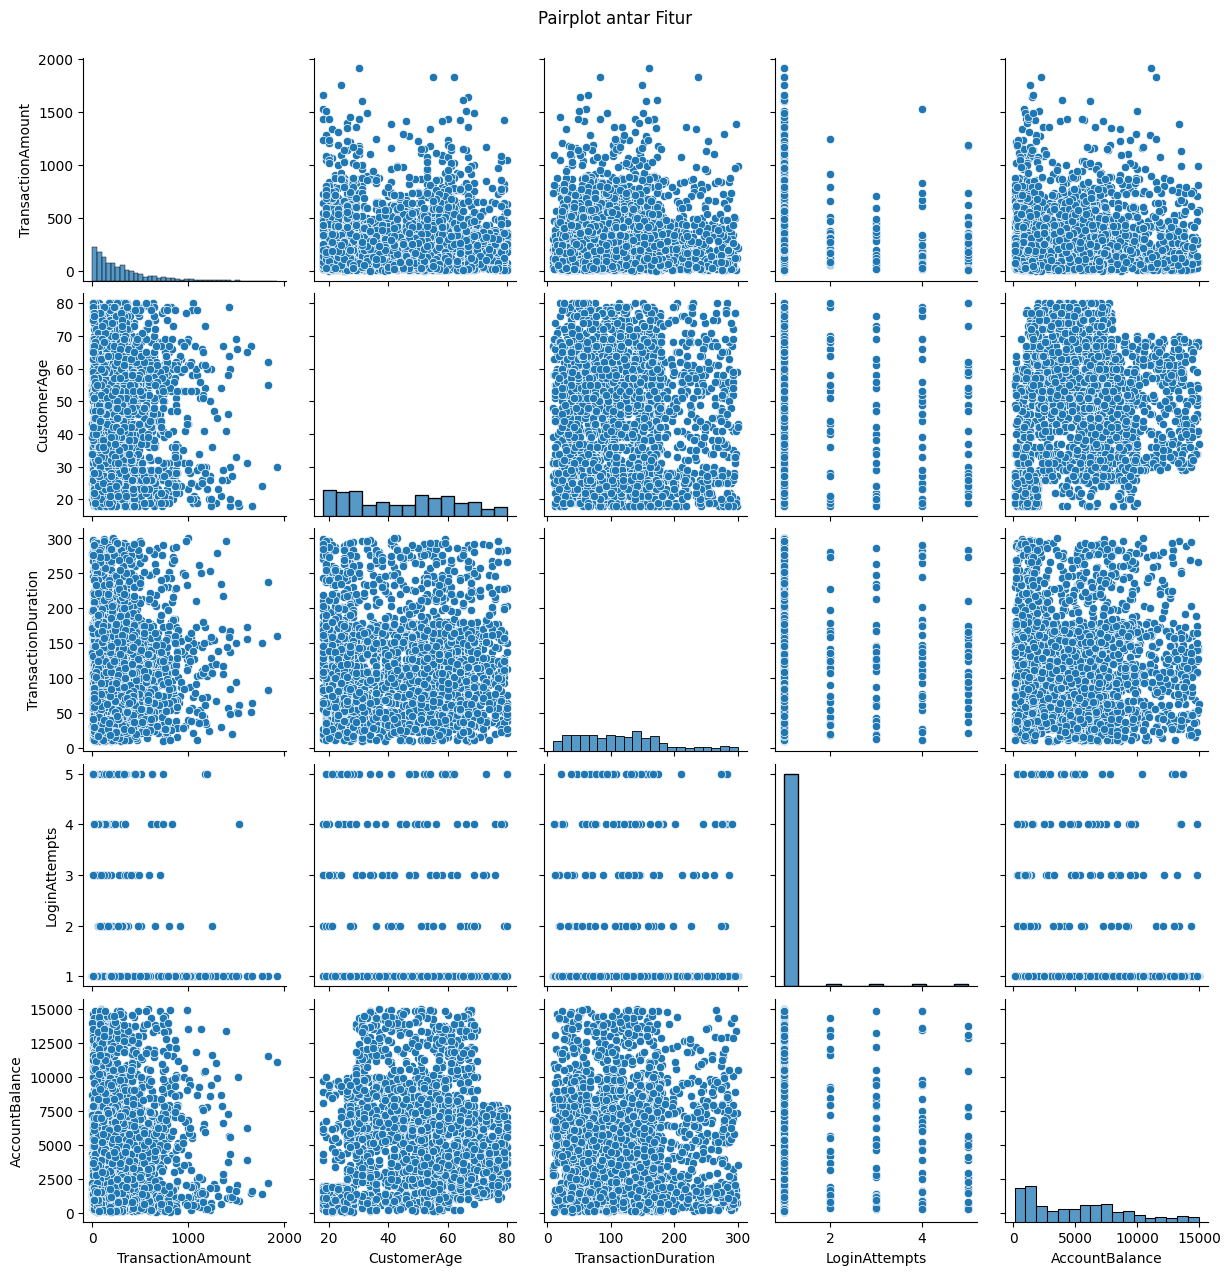

In [44]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df)
plt.suptitle("Pairplot antar Fitur", y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [45]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah nilai null per kolom:")
print(df.isnull().sum())

Jumlah nilai null per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [46]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah baris duplikat:")
print(df.duplicated().sum())

Jumlah baris duplikat:
21


In [47]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
numerik_cols = df.select_dtypes(include='number').columns.tolist()
scaler = MinMaxScaler()
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

print("Scaling selesai untuk fitur numerik.")


Scaling selesai untuk fitur numerik.


In [48]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
drop_cols = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df.drop(columns=drop_cols, inplace=True)

print(f"\n🔹 Kolom yang di-drop: {drop_cols}")


🔹 Kolom yang di-drop: ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']


In [49]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Identifikasi kolom kategorikal
kategorikal_cols = df.select_dtypes(include='object').columns.tolist()

# Menggunakan get_dummies (alternatif: LabelEncoder jika hanya satu kolom)
df = pd.get_dummies(df, columns=kategorikal_cols)

print(f"\n🔹 Encoding selesai untuk kolom: {kategorikal_cols}")


🔹 Encoding selesai untuk kolom: ['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [54]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).


In [53]:
# Menghapus data duplikat menggunakan drop_duplicates().


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [55]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.


In [56]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [57]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()


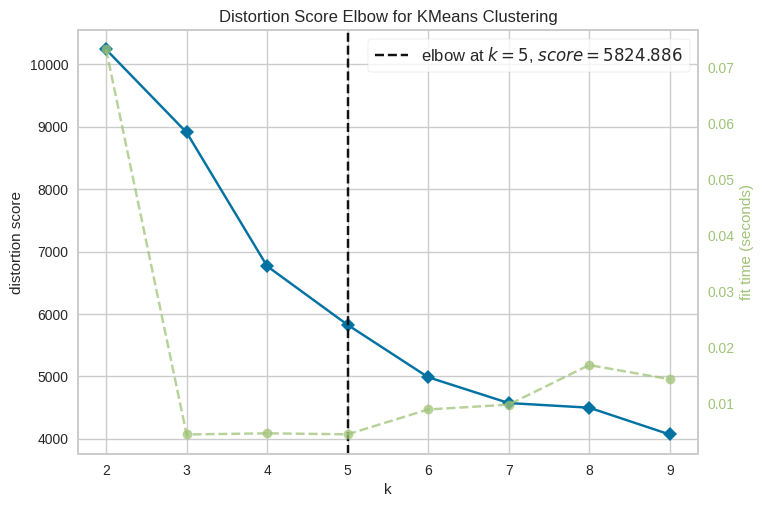

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Membuat model KMeans
model = KMeans(random_state=42)

# Select numerical features for scaling (assuming they've been preprocessed)
X = df.select_dtypes(include='number')

# Before scaling, impute or drop NaN values
# Option 1: Impute with the mean
X = X.fillna(X.mean())  # Replace NaNs with the mean of each column

# Option 2: Drop rows with NaNs
# X = X.dropna()  # Remove rows containing NaNs

# Scale the numerical features using StandardScaler or MinMaxScaler
scaler = StandardScaler() # or MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Visualisasi Elbow untuk mencari jumlah cluster optimal
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled) # Now using the scaled data
visualizer.show()

In [68]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Menambahkan label cluster ke data asli
df['Cluster'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [88]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "hasil_clustering.h5")


['hasil_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [84]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

def analisis_cluster(df, cluster_col='Cluster'):
    clusters = df[cluster_col].unique()
    hasil_analisis = {}

    for cluster in sorted(clusters):
        data_cluster = df[df[cluster_col] == cluster]
        deskripsi = {}

        # Fitur numerik
        fitur_numerik = data_cluster.select_dtypes(include=np.number).columns
        for fitur in fitur_numerik:
            mean = data_cluster[fitur].mean()
            min_val = data_cluster[fitur].min()
            max_val = data_cluster[fitur].max()
            deskripsi[fitur] = {
                'mean': round(mean, 2),
                'min': round(min_val, 2),
                'max': round(max_val, 2)
            }

        # Fitur kategorikal
        fitur_kategorikal = data_cluster.select_dtypes(include='object').columns
        for fitur in fitur_kategorikal:
            modus = data_cluster[fitur].mode().iloc[0] if not data_cluster[fitur].mode().empty else None
            deskripsi[fitur] = {
                'modus': modus
            }

        hasil_analisis[f'Cluster {cluster}'] = deskripsi

    return hasil_analisis

# Contoh pemanggilan fungsi
hasil = analisis_cluster(df, cluster_col='Cluster')

# Tampilkan hasil
for cluster, fitur in hasil.items():
    print(f"\n{cluster}:")
    for nama_fitur, stat in fitur.items():
        print(f"  {nama_fitur}: {stat}")


Cluster 0:
  TransactionAmount: {'mean': np.float64(0.12), 'min': 0.0, 'max': 0.41}
  CustomerAge: {'mean': np.float64(0.16), 'min': 0.0, 'max': 0.65}
  TransactionDuration: {'mean': np.float64(0.37), 'min': 0.0, 'max': 1.0}
  LoginAttempts: {'mean': np.float64(0.03), 'min': 0.0, 'max': 1.0}
  AccountBalance: {'mean': np.float64(0.12), 'min': 0.0, 'max': 0.65}
  Cluster: {'mean': np.float64(0.0), 'min': 0, 'max': 0}

Cluster 1:
  TransactionAmount: {'mean': np.float64(0.1), 'min': 0.0, 'max': 0.35}
  CustomerAge: {'mean': np.float64(0.6), 'min': 0.08, 'max': 1.0}
  TransactionDuration: {'mean': np.float64(0.38), 'min': 0.0, 'max': 1.0}
  LoginAttempts: {'mean': np.float64(0.03), 'min': 0.0, 'max': 1.0}
  AccountBalance: {'mean': np.float64(0.47), 'min': 0.02, 'max': 1.0}
  Cluster: {'mean': np.float64(1.0), 'min': 1, 'max': 1}

Cluster 2:
  TransactionAmount: {'mean': np.float64(0.46), 'min': 0.25, 'max': 1.0}
  CustomerAge: {'mean': np.float64(0.46), 'min': 0.0, 'max': 1.0}
  Transac

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
# Cluster 0: Nasabah Muda & Aktivitas Rendah
Rata-rata:

- TransactionAmount: 0.12
- CustomerAge: 0.16
- TransactionDuration: 0.37
- LoginAttempts: 0.03
- AccountBalance: 0.12



Analisis:
Cluster ini mencakup pelanggan dengan usia relatif muda (0.16) dan nilai transaksi serta saldo yang rendah. Durasi transaksi sedang, tetapi jarang melakukan login. Pelanggan ini bisa jadi nasabah baru atau tidak aktif.
Rekomendasi: Berikan edukasi keuangan dan promosi awal untuk meningkatkan keterlibatan dan transaksi.


# Cluster 1: Nasabah Usia Dewasa, Transaksi Kecil namun Saldo Tinggi
Rata-rata:

- TransactionAmount: 0.10
- CustomerAge: 0.60
- TransactionDuration: 0.38
- LoginAttempts: 0.03
- AccountBalance: 0.47

Analisis:
Cluster ini berisi pelanggan yang lebih dewasa (usia relatif tinggi) dengan nominal transaksi yang kecil namun memiliki saldo yang besar. Kemungkinan mereka menyimpan dana namun tidak sering bertransaksi.
Rekomendasi: Tawarkan produk tabungan berjangka, deposito, atau layanan investasi aman jangka panjang.

# Cluster 2: Nasabah Aktif & Transaksi Besar
Rata-rata:

- TransactionAmount: 0.46
- CustomerAge: 0.46
- TransactionDuration: 0.36
- LoginAttempts: 0.02
- AccountBalance: 0.36

Analisis:
Cluster ini mewakili nasabah dengan nilai transaksi tinggi dan usia menengah, serta saldo yang cukup. Mereka mungkin pelanggan aktif yang melakukan transaksi rutin dan sering menggunakan produk bank.
Rekomendasi: Tawarkan reward, cashback, atau bundling produk agar loyalitas tetap tinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [86]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df['Target'] = df['Cluster']

# Simpan data ke file CSV
df.to_csv('dataset_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)